# Worksheet 7 - Classification (Part II)

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe what a test data set is and how it is used in classification.
* Using Python, evaluate classification accuracy using a test data set and appropriate metrics.
* Using Python, execute cross-validation in Python to choose the number of neighbours.
* Identify when it is necessary to scale variables before classification and do this using Python
* In a dataset with > 2 attributes, perform k-nearest neighbour classification in Python using the `scikit-learn` package to predict the class of a test dataset.
* Describe advantages and disadvantages of the k-nearest neighbour classification algorithm.

This worksheet covers parts of [Chapter 6](https://python.datasciencebook.ca/classification2) of the online textbook. You should read this chapter before attempting this assignment. Any place you see `___`, you must fill in the function, variable, or data to complete the code. Substitute the `raise NotImplementedError` with your completed code and answers then proceed to run the cell!

In [1]:
### Run this cell before continuing.
import altair as alt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Simplify working with large datasets in Altair
alt.data_transformers.disable_max_rows()

# Output dataframes instead of arrays
set_config(transform_output="pandas")

**Question 0.1** Multiple Choice:
<br>{points: 1}

Before applying k-nearest neighbour to a classification task, we need to scale the data. What is the purpose of this step?

A. To help speed up the knn algorithm.

B. To convert all data observations to numeric values.

C. To ensure all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points.

D. None of the above.

*Assign your answer to an object called `answer0_1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`)*.

In [2]:
# your code here
answer0_1 = "C"

In [3]:
from hashlib import sha1
assert sha1(str(type(answer0_1)).encode("utf-8")+b"94d054390c043034").hexdigest() == "8e42b3e50a43811db424033c861f9c72b0171269", "type of answer0_1 is not str. answer0_1 should be an str"
assert sha1(str(len(answer0_1)).encode("utf-8")+b"94d054390c043034").hexdigest() == "9000c952cdcd26cdbc2a6bf3ff09378463e975e2", "length of answer0_1 is not correct"
assert sha1(str(answer0_1.lower()).encode("utf-8")+b"94d054390c043034").hexdigest() == "80c8d58ecf2b8d29a2f992f7c4545d7e3123453b", "value of answer0_1 is not correct"
assert sha1(str(answer0_1).encode("utf-8")+b"94d054390c043034").hexdigest() == "91290eec9bae00fc340ef6efb33f505556d38fa7", "correct string value of answer0_1 but incorrect case of letters"

print('Success!')

Success!


## 1. Fruit Data Example - (Part II)
**Question 1.0** 
<br>{points: 1}

You will recognize a few of the first questions in this worksheet from last week's tutorial. This will help you repeat some of the fundamentals of classification before tackling the later questions in this worksheet, which integrate concepts you learned from this week's material. First, load the file `fruit_data.csv` (found in the data folder) from the previous tutorial into your notebook.

*Assign your data to an object called `fruit_data`.*

In [4]:
# your code here
fruit_data = pd.read_csv('data/fruit_data.csv')

In [5]:
from hashlib import sha1
assert sha1(str(type(fruit_data is None)).encode("utf-8")+b"c02fd8f5969c1a15").hexdigest() == "1e552628e1ea86fd9d2b07fda232d27de24a265b", "type of fruit_data is None is not bool. fruit_data is None should be a bool"
assert sha1(str(fruit_data is None).encode("utf-8")+b"c02fd8f5969c1a15").hexdigest() == "1db6ced3ad5aafecef65c432a5694ad5408901d5", "boolean value of fruit_data is None is not correct"

assert sha1(str(type(fruit_data.shape)).encode("utf-8")+b"7c6158b4d7cb9aa1").hexdigest() == "350fc2e02ec7de678e155b64dd03b8125e8adcad", "type of fruit_data.shape is not tuple. fruit_data.shape should be a tuple"
assert sha1(str(len(fruit_data.shape)).encode("utf-8")+b"7c6158b4d7cb9aa1").hexdigest() == "156ba1887aa8ec073a5a4912dfd4648b8dc4d0fc", "length of fruit_data.shape is not correct"
assert sha1(str(sorted(map(str, fruit_data.shape))).encode("utf-8")+b"7c6158b4d7cb9aa1").hexdigest() == "c1faac9cb54d00b7c55eade87c1da689ddbcc711", "values of fruit_data.shape are not correct"
assert sha1(str(fruit_data.shape).encode("utf-8")+b"7c6158b4d7cb9aa1").hexdigest() == "0202ba5c2215f671aeb4125223d8f3b6d00b416a", "order of elements of fruit_data.shape is not correct"

assert sha1(str(type(fruit_data.fruit_name.dtype)).encode("utf-8")+b"98b239eb5a3396de").hexdigest() == "fcca0c36d1ece4cbc804fea0ca06c92cd246bd00", "type of fruit_data.fruit_name.dtype is not correct"
assert sha1(str(fruit_data.fruit_name.dtype).encode("utf-8")+b"98b239eb5a3396de").hexdigest() == "7d9f72daeeb477aea4febab084a4d783b13cccb2", "value of fruit_data.fruit_name.dtype is not correct"

print('Success!')

AssertionError: type of fruit_data.fruit_name.dtype is not correct

Let's take a look at the first few observations in the fruit dataset. Run the cell below.

In [6]:
# Run this cell.
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Run the cell below, and find the nearest neighbour based on mass and width to the first observation just by looking at the scatterplot (the first observation has been circled for you).

In [7]:
# Create the scatterplot
fruit_chart = alt.Chart(fruit_data).mark_point(size=15).encode(
    x=alt.X("mass").title("Mass (grams)"),
    y=alt.Y("width")
        .title("Width (cm)")
        .scale(zero=False),
    color=alt.Color("fruit_name").title("Fruit")
)
# Create the circle around point1
point1 = alt.Chart().mark_point(size=300, color='black').encode(
    x=alt.datum(fruit_data.loc[0, "mass"]),
    y=alt.datum(fruit_data.loc[0, "width"]),
    text=alt.datum('1')
)

# Layer the scatterplot, point1 circle, and a text annotation
fruit_chart + point1 + point1.mark_text(size=14, dx=12, align='left')

d:\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
d:\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

**Question 1.1** Multiple Choice:
<br>{points: 1}

Based on the graph generated, what is the `fruit_name` of the closest data point to the one circled?

A. apple

B. lemon

C. mandarin

D. orange

*Assign your answer to an object called `answer1_1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [8]:
# your code here
answer1_1 = "A"

In [9]:
from hashlib import sha1
assert sha1(str(type(answer1_1)).encode("utf-8")+b"a6884b4e9568c336").hexdigest() == "323b35234c4aee666c81031129c58547f225da90", "type of answer1_1 is not str. answer1_1 should be an str"
assert sha1(str(len(answer1_1)).encode("utf-8")+b"a6884b4e9568c336").hexdigest() == "6e1631aef38b9bb509f606c086e46617ab91def0", "length of answer1_1 is not correct"
assert sha1(str(answer1_1.lower()).encode("utf-8")+b"a6884b4e9568c336").hexdigest() == "f4d8802375db62f06d96ba1e9749ffe7c0f1814a", "value of answer1_1 is not correct"
assert sha1(str(answer1_1).encode("utf-8")+b"a6884b4e9568c336").hexdigest() == "5b0bfcab8e256fe2d9312856a772e43c9aff80ca", "correct string value of answer1_1 but incorrect case of letters"

print('Success!')

Success!


**Question 1.2**
<br>{points: 1}

Using `mass` and `width`, calculate the distance between the first observation and the second observation.

We provide a scaffolding to get you started.

*Assign your answer to an object called `fruit_dist_2`.*

In [15]:
# ___ = euclidean_distances(fruit_data.loc[[___, 1], ["mass", ___]])

# your code here

fruit_dist_2 = euclidean_distances(fruit_data.loc[[0, 1], ["mass", "width"]])
fruit_dist_2

array([[ 0.        , 12.00666482],
       [12.00666482,  0.        ]])

In [11]:
from hashlib import sha1
assert sha1(str(type(fruit_dist_2)).encode("utf-8")+b"55f501d1d0040e0d").hexdigest() == "908775688c2fd82d12162aff8dffd436d1afb22e", "type of fruit_dist_2 is not correct"
assert sha1(str(fruit_dist_2).encode("utf-8")+b"55f501d1d0040e0d").hexdigest() == "3f3b9190dbe86f486451b55a1a1f22b50f41a693", "value of fruit_dist_2 is not correct"

print('Success!')

Success!


**Question 1.3**
<br>{points: 1}

Calculate the distance between the first and the **44th observation** in the `fruit` dataset using the `mass` and `width` variables.

*Assign your answer to an object called `fruit_dist_44`.*

In [16]:
# your code here
fruit_dist_44 = euclidean_distances(fruit_data.loc[[0, 43], ["mass", "width"]])
fruit_dist_44

array([[0.        , 2.33238076],
       [2.33238076, 0.        ]])

In [13]:
from hashlib import sha1
assert sha1(str(type(fruit_dist_44)).encode("utf-8")+b"8fe65ecb7fa0747f").hexdigest() == "2d0e062cdae6c63fa41e66bddff788f82d0ab325", "type of fruit_dist_44 is not correct"
assert sha1(str(fruit_dist_44).encode("utf-8")+b"8fe65ecb7fa0747f").hexdigest() == "ebe8af759153293119141781ca71de14af9f378d", "value of fruit_dist_44 is not correct"

print('Success!')

Success!


What do you notice about your answers from **Question 1.2** & **1.3** that you just calculated? Is it what you would expect given the scatter plot below? Why or why not? Discuss this.

*Hint: Look at where the observations are on the scatterplot in the cell below this question. What might happen if we changed grams into kilograms to measure the mass?*

In [14]:
# Run this cell to see the scatter plot
points = alt.Chart(
    fruit_data.loc[[0, 1, 43], ['mass', 'width']].assign(point_number=[1, 2, 44])
).mark_point(size=300, color='black').encode(
    x='mass',
    y='width',
    text='point_number'
)

fruit_chart + points + points.mark_text(size=14, dx=12, align='left')

d:\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
d:\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

**Question 1.4**
<br>{points: 1}

From the distance calculation, we see that observation 1 and 44 have a smaller distance than observation 1 and 2. However, if we look at the scatterplot the distance of the first observation to the second observation appears closer than to the 44th observation.

Which of the following statements is correct?

A. A difference of 12 g in mass between observation 1 and 2 is large compared to a difference of 1.2 cm in width between observation 1 and 44. Consequently, mass will drive the classification results, and width will have less of an effect. Hence, our distance calculation reflects that.

B. If we measured mass in kilograms, then we’d get different classification results.

C. We should standardize the data so that all variables will be on a comparable scale.

D. All of the above.

*Assign your answer to an object called `answer1_4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [17]:
# your code here
answer1_4 = "D"

In [18]:
from hashlib import sha1
assert sha1(str(type(answer1_4)).encode("utf-8")+b"4c840f2f8c7e2ecc").hexdigest() == "8d747569f3410014cbe1e93f3aac961e6daacb20", "type of answer1_4 is not str. answer1_4 should be an str"
assert sha1(str(len(answer1_4)).encode("utf-8")+b"4c840f2f8c7e2ecc").hexdigest() == "019a2fd8949918ffc77b122412eae0e90f95716a", "length of answer1_4 is not correct"
assert sha1(str(answer1_4.lower()).encode("utf-8")+b"4c840f2f8c7e2ecc").hexdigest() == "5ad901d90db7946bd30a2589ab7c1d6cbcac3cf3", "value of answer1_4 is not correct"
assert sha1(str(answer1_4).encode("utf-8")+b"4c840f2f8c7e2ecc").hexdigest() == "f0cd4d398aaa46c0154955477ce62b3c46dc153a", "correct string value of answer1_4 but incorrect case of letters"

print('Success!')

Success!


**Question 1.5**
<br> {points: 1}

Let's create a `preprocessor` to *standardize* (i.e., center and scale) all of the variables in the fruit dataset. Centering will make sure that every variable has an average of 0, and scaling will make sure that every variable has standard deviation of 1. We will use the `StandardScaler` in the `preprocessor`. Then `fit_transform` the preprocessor so that we can examine the output.

Fit and transform your preprocessor with predictors `mass`, `width`, `height`, and `color_score`. Pass through all the remaining columns.

Name the preprocessor `fruit_data_preprocessor`, and name the preprocessed data frame `fruit_data_scaled`.

In [36]:
# ___ = ___(
#     (StandardScaler(), [___, ___, ___, ___]),
#     remainder=___
# )

# ___ = fruit_data_preprocessor.___(___)


# your code here

fruit_data_preprocessor = make_column_transformer(
    (StandardScaler(), ["mass", "width", "height", "color_score"]),
    remainder='passthrough',
    verbose_feature_names_out=False
)
fruit_data_scaled = fruit_data_preprocessor.fit_transform(fruit_data)
#fruit_data_scaled.rename(columns={"remainder__fruit_label": "fruit_label", "remainder__fruit_name": "fruit_name", "remainder__fruit_subtype": "fruit_subtype", "remainder__color_score": "color_score"}, inplace=False)

fruit_data_scaled.head()

,mass,width,height,color_score,fruit_label,fruit_name,fruit_subtype
0,0.529442,1.598690,-0.291397,-2.793595,1,apple,granny_smith
1,0.309462,1.104854,-0.661922,-2.268684,1,apple,granny_smith
2,0.236136,0.364100,-0.365502,-2.137456,1,apple,granny_smith
3,-1.413709,-1.117409,-2.218131,0.487100,2,mandarin,mandarin
4,-1.450372,-1.364327,-2.292236,0.355872,2,mandarin,mandarin


In [37]:
from hashlib import sha1
assert sha1(str(type(fruit_data_scaled is None)).encode("utf-8")+b"335d9c06fbd9d8ad").hexdigest() == "3f73c3e9f48dc9cc05dfc4007f63f9abea0f0f53", "type of fruit_data_scaled is None is not bool. fruit_data_scaled is None should be a bool"
assert sha1(str(fruit_data_scaled is None).encode("utf-8")+b"335d9c06fbd9d8ad").hexdigest() == "81d8bc987fa226de6fb0b34a13f1f71a780e8ef1", "boolean value of fruit_data_scaled is None is not correct"

assert sha1(str(type(fruit_data_scaled.shape)).encode("utf-8")+b"b84e13a83eacce58").hexdigest() == "1b6adf18ca101c60e9e31011f144c31539de5433", "type of fruit_data_scaled.shape is not tuple. fruit_data_scaled.shape should be a tuple"
assert sha1(str(len(fruit_data_scaled.shape)).encode("utf-8")+b"b84e13a83eacce58").hexdigest() == "e85999eab51a47313915baddb00c3ff3b754c2f0", "length of fruit_data_scaled.shape is not correct"
assert sha1(str(sorted(map(str, fruit_data_scaled.shape))).encode("utf-8")+b"b84e13a83eacce58").hexdigest() == "d4b92462378b2348c777b01a78f59566909afbaa", "values of fruit_data_scaled.shape are not correct"
assert sha1(str(fruit_data_scaled.shape).encode("utf-8")+b"b84e13a83eacce58").hexdigest() == "4c7064e30c4abe180696604c9dc78586b2fd8b50", "order of elements of fruit_data_scaled.shape is not correct"

assert sha1(str(type(fruit_data_scaled.fruit_name.dtype)).encode("utf-8")+b"acde151bb6541ce1").hexdigest() == "4e36f874a3f2ba4fa8be553811b77edf81582c1c", "type of fruit_data_scaled.fruit_name.dtype is not correct"
assert sha1(str(fruit_data_scaled.fruit_name.dtype).encode("utf-8")+b"acde151bb6541ce1").hexdigest() == "0ebba7f85d49467655ea11525b92744bcbcfc21f", "value of fruit_data_scaled.fruit_name.dtype is not correct"

assert sha1(str(type(np.mean(fruit_data_scaled.mass.dropna()))).encode("utf-8")+b"83625941ae7f5d67").hexdigest() == "b9568758dcd23e2ecbae067007a66155d884826e", "type of np.mean(fruit_data_scaled.mass.dropna()) is not correct"
assert sha1(str(np.mean(fruit_data_scaled.mass.dropna())).encode("utf-8")+b"83625941ae7f5d67").hexdigest() == "ec266f33b3b04846efff5c5e2d5bb576226a18b7", "value of np.mean(fruit_data_scaled.mass.dropna()) is not correct"

assert sha1(str(type(np.mean(fruit_data_scaled.height.dropna()))).encode("utf-8")+b"e92db8446096557d").hexdigest() == "e3e8da42f5a9797deafbff97feb10a26f11dce10", "type of np.mean(fruit_data_scaled.height.dropna()) is not correct"
assert sha1(str(np.mean(fruit_data_scaled.height.dropna())).encode("utf-8")+b"e92db8446096557d").hexdigest() == "69a167c8cb79808943f579974a959f42e1c65372", "value of np.mean(fruit_data_scaled.height.dropna()) is not correct"

assert sha1(str(type(np.mean(fruit_data_scaled.width.dropna()))).encode("utf-8")+b"a46e68060c97aa3e").hexdigest() == "4ae9a7d44f937d4b662abda9de4d4b858eee729e", "type of np.mean(fruit_data_scaled.width.dropna()) is not correct"
assert sha1(str(np.mean(fruit_data_scaled.width.dropna())).encode("utf-8")+b"a46e68060c97aa3e").hexdigest() == "bf057696429ecb6063c44f5d355319591650cfaf", "value of np.mean(fruit_data_scaled.width.dropna()) is not correct"

assert sha1(str(type(np.mean(fruit_data_scaled.color_score.dropna()))).encode("utf-8")+b"87a200924ab10707").hexdigest() == "b39ebd54400334f2bfd04f156a231d79b5755aac", "type of np.mean(fruit_data_scaled.color_score.dropna()) is not correct"
assert sha1(str(np.mean(fruit_data_scaled.color_score.dropna())).encode("utf-8")+b"87a200924ab10707").hexdigest() == "eb693a3fdb7c1da732708d05d63e775758a50adc", "value of np.mean(fruit_data_scaled.color_score.dropna()) is not correct"

assert sha1(str(type(np.std(fruit_data_scaled.mass.dropna()))).encode("utf-8")+b"9ba7ebb5e32d0577").hexdigest() == "e3808885a14785cd9fc3d5fc72b7336f0f51aea9", "type of np.std(fruit_data_scaled.mass.dropna()) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(np.std(fruit_data_scaled.mass.dropna()), 2)).encode("utf-8")+b"9ba7ebb5e32d0577").hexdigest() == "ac78a864fe74cf5f387cdbf7f6aa38482eb8fdd1", "value of np.std(fruit_data_scaled.mass.dropna()) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(np.std(fruit_data_scaled.height.dropna()))).encode("utf-8")+b"e1f6f56efee33b3d").hexdigest() == "37de2552874a12fc78316065e9526a29d6418b8f", "type of np.std(fruit_data_scaled.height.dropna()) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(np.std(fruit_data_scaled.height.dropna()), 2)).encode("utf-8")+b"e1f6f56efee33b3d").hexdigest() == "0f16ce12f1736b9ecc863650451165cee16f65dc", "value of np.std(fruit_data_scaled.height.dropna()) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(np.std(fruit_data_scaled.width.dropna()))).encode("utf-8")+b"3b91da2697165d74").hexdigest() == "2c29db3fed17b5e493bed3d2bd3a790e9a4aa356", "type of np.std(fruit_data_scaled.width.dropna()) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(np.std(fruit_data_scaled.width.dropna()), 2)).encode("utf-8")+b"3b91da2697165d74").hexdigest() == "6624cfea1bbe347dfae99bff332914d32bc1d362", "value of np.std(fruit_data_scaled.width.dropna()) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(np.std(fruit_data_scaled.color_score.dropna()))).encode("utf-8")+b"8c28c0eab4710b65").hexdigest() == "d467f0d7f745fc12391ea02eb10494b5c4553b1a", "type of np.std(fruit_data_scaled.color_score.dropna()) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(np.std(fruit_data_scaled.color_score.dropna()), 2)).encode("utf-8")+b"8c28c0eab4710b65").hexdigest() == "3c4e50b418f8586e3c69fecf90bab4dc8548b451", "value of np.std(fruit_data_scaled.color_score.dropna()) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(fruit_data_preprocessor is None)).encode("utf-8")+b"31e30d515edaa809").hexdigest() == "e447a328fe94bafa9b4588cae36fb9a4db3304ae", "type of fruit_data_preprocessor is None is not bool. fruit_data_preprocessor is None should be a bool"
assert sha1(str(fruit_data_preprocessor is None).encode("utf-8")+b"31e30d515edaa809").hexdigest() == "5b658ebdfeccf5440cd48c39927e19299918a74b", "boolean value of fruit_data_preprocessor is None is not correct"

assert sha1(str(type(fruit_data_preprocessor.transformers_[1][2])).encode("utf-8")+b"5bb8d93cae37abca").hexdigest() == "927325026578f8a2ad91a7d6ddd219dab2d17104", "type of fruit_data_preprocessor.transformers_[1][2] is not list. fruit_data_preprocessor.transformers_[1][2] should be a list"
assert sha1(str(len(fruit_data_preprocessor.transformers_[1][2])).encode("utf-8")+b"5bb8d93cae37abca").hexdigest() == "89d40589f970b9e9cdeacbeac3d6b306e394a41a", "length of fruit_data_preprocessor.transformers_[1][2] is not correct"
assert sha1(str(sorted(map(str, fruit_data_preprocessor.transformers_[1][2]))).encode("utf-8")+b"5bb8d93cae37abca").hexdigest() == "6ba71057226ce114fd2a97a2d44fecef69ff6335", "values of fruit_data_preprocessor.transformers_[1][2] are not correct"
assert sha1(str(fruit_data_preprocessor.transformers_[1][2]).encode("utf-8")+b"5bb8d93cae37abca").hexdigest() == "6116d4eb2eee9c3e4d73ecd588e9b2d27add4d52", "order of elements of fruit_data_preprocessor.transformers_[1][2] is not correct"

print('Success!')

AssertionError: type of fruit_data_scaled.fruit_name.dtype is not correct

**Question 1.6**
<br> {points: 1}

Let's repeat **Question 1.2 and 1.3** with the scaled variables:

- calculate the distance with the scaled mass and width variables between observations 1 and 2
- calculate the distances with the scaled mass and width variables between observations 1 and 44 

After you do this, think about how these distances compared to the distances you computed in **Question 1.2 and 1.3** for the same points.

*Assign your answers to objects called `distance_2` and `distance_44` respectively.*

In [40]:
# your code here
distance_2 = euclidean_distances(fruit_data_scaled.loc[[0, 1],['mass','width']])
distance_44 = euclidean_distances(fruit_data_scaled.loc[[0, 43],['mass','width']])
print(distance_2)
print(distance_44)

[[0.         0.54061553]
 [0.54061553 0.        ]]
[[0.         1.48196235]
 [1.48196235 0.        ]]


In [41]:
from hashlib import sha1
assert sha1(str(type(distance_2 is None)).encode("utf-8")+b"0ea80747a2598e5d").hexdigest() == "8c99a4740301f868363024cf1b10a34edcaea1e8", "type of distance_2 is None is not bool. distance_2 is None should be a bool"
assert sha1(str(distance_2 is None).encode("utf-8")+b"0ea80747a2598e5d").hexdigest() == "3d4fa147bde5aefabee1abd4194cd2d10e4b5c4b", "boolean value of distance_2 is None is not correct"

assert sha1(str(type(distance_44 is None)).encode("utf-8")+b"7cea975e2dfcccf6").hexdigest() == "e75701b4cd5b7ac845b9140942c7bf5f51c2ec44", "type of distance_44 is None is not bool. distance_44 is None should be a bool"
assert sha1(str(distance_44 is None).encode("utf-8")+b"7cea975e2dfcccf6").hexdigest() == "92180fbe3803a5dc0d8423ccb1cc6870b2e13738", "boolean value of distance_44 is None is not correct"

assert sha1(str(type(distance_2)).encode("utf-8")+b"04568ab9de664a1e").hexdigest() == "2bf8c7bd116212891edd664264fb1eeb7a5c0082", "type of type(distance_2) is not correct"

assert sha1(str(type(distance_44)).encode("utf-8")+b"835565244bdae132").hexdigest() == "f29a10b6a1386b21a0639449afa9e87398d0a13a", "type of type(distance_44) is not correct"

assert sha1(str(type(distance_2)).encode("utf-8")+b"db8259fee5b956eb").hexdigest() == "634a51b4fc9c9d4fa1c3806b72cf5c80fbbac6f4", "type of distance_2 is not correct"
assert sha1(str(distance_2).encode("utf-8")+b"db8259fee5b956eb").hexdigest() == "69f2bdb3f28c99ff05121d76ebdace214856192d", "value of distance_2 is not correct"

assert sha1(str(type(distance_44)).encode("utf-8")+b"1861c601909daeb8").hexdigest() == "aa97dd085fc92f0ef926baa4acb875e1d8d83db9", "type of distance_44 is not correct"
assert sha1(str(distance_44).encode("utf-8")+b"1861c601909daeb8").hexdigest() == "20f4ac66462deed4e2847f8598af7217d316b767", "value of distance_44 is not correct"

print('Success!')

Success!


## Randomness and Setting Seeds

This worksheet uses functions from the `scikit-learn` library, which not only allows us to perform K-nearest neighbour classification, but also allows us to evaluate how well our classification worked. In order to ensure that the steps in the worksheet are reproducible, we need to set a *`random_state`* or *random seed*, i.e., a numerical "starting value," which determines the sequence of random numbers Python will generate.

Below in many cells we have included an argument to set the `random_state` or `np.random.seed`. They are necessary to make sure the autotesting code functions properly.

## 2. Splitting the data into a training and test set

In this exercise, we will be partitioning `fruit_data` into a training (75%) and testing (25%) set using the `scikit-learn` package. After creating the test set, we will put the test set away in a lock box and not touch it again until we have found the best k-nn classifier we can make using the training set. We will use the variable `fruit_name` as our class label. 


**Question 2.0**
<br> {points: 1}

To create the training and test set, we would use the `train_test_split` function from `scikit-learn` pacakge. Save the trained dataset and test dataset as `fruit_train` and `fruit_test`, respectively. 

In [42]:
# Randomly take 75% of the data in the training set.
# This will be proportional to the different number of fruit names in the dataset.

# ___, ___ = train_test_split(___, test_size=___, random_state=123) # set the random state to be 123

# your code here
fruit_train, fruit_test = train_test_split(fruit_data_scaled, test_size=0.25, random_state=123)
fruit_train

,mass,width,height,color_score,fruit_label,fruit_name,fruit_subtype
10,0.052820,-0.253196,-0.291397,2.193061,1,apple,braeburn
43,0.566105,0.117181,1.931758,-0.825178,4,lemon,spanish_belsan
8,0.272799,-0.006278,0.079129,2.061834,1,apple,braeburn
12,-0.167159,-0.129737,-0.439607,1.536922,1,apple,braeburn
50,-0.607118,-1.364327,0.375550,-0.693950,4,lemon,unknown
49,-0.570455,-1.611245,0.746076,-0.431495,4,lemon,unknown
21,-0.130496,0.364100,-0.217291,1.012011,1,apple,cripps_pink
1,0.309462,1.104854,-0.661922,-2.268684,1,apple,granny_smith
6,-1.523699,-1.487786,-2.514552,0.618328,2,mandarin,mandarin
39,-0.350476,-0.376655,-0.217291,-0.169039,3,orange,turkey_navel


In [43]:
fruit_test

,mass,width,height,color_score,fruit_label,fruit_name,fruit_subtype
51,-0.863761,-1.364327,-0.143186,-0.562723,4,lemon,unknown
41,0.309462,0.611018,0.375550,0.355872,3,orange,turkey_navel
13,0.016157,0.240641,0.005024,-0.825178,1,apple,golden_delicious
53,-0.790434,-1.364327,0.523760,-0.300267,4,lemon,unknown
27,0.749421,0.487559,1.116602,0.093416,3,orange,selected_seconds
26,3.645816,3.080199,1.116602,-0.300267,3,orange,spanish_jumbo
56,-0.863761,-1.487786,0.301445,-0.431495,4,lemon,unknown
37,-0.167159,0.240641,-0.291397,0.355872,3,orange,turkey_navel
18,-0.020507,0.487559,-0.439607,0.880783,1,apple,cripps_pink
23,0.126146,0.611018,0.153234,1.536922,1,apple,cripps_pink


In [44]:
from hashlib import sha1
assert sha1(str(type(fruit_train is None)).encode("utf-8")+b"01bdb9326dd0c6db").hexdigest() == "fe7df01077d8132ab457af18d81dac2694110e9c", "type of fruit_train is None is not bool. fruit_train is None should be a bool"
assert sha1(str(fruit_train is None).encode("utf-8")+b"01bdb9326dd0c6db").hexdigest() == "0896557e60d618d842cfc35bedd779928e63edbc", "boolean value of fruit_train is None is not correct"

assert sha1(str(type(fruit_test is None)).encode("utf-8")+b"d83f89fbda208926").hexdigest() == "b065b6aa1430ba62a4f70922a629f03cf53e14c3", "type of fruit_test is None is not bool. fruit_test is None should be a bool"
assert sha1(str(fruit_test is None).encode("utf-8")+b"d83f89fbda208926").hexdigest() == "4d602038582e415547820554a9eaa8c3ba44b149", "boolean value of fruit_test is None is not correct"

assert sha1(str(type(fruit_train.shape)).encode("utf-8")+b"e9fbc8b10be080b5").hexdigest() == "2cc5ea275061feb765bf1ca382536750c981894a", "type of fruit_train.shape is not tuple. fruit_train.shape should be a tuple"
assert sha1(str(len(fruit_train.shape)).encode("utf-8")+b"e9fbc8b10be080b5").hexdigest() == "c67e8d5c1c6f6109debc5f2e849182f8783b885f", "length of fruit_train.shape is not correct"
assert sha1(str(sorted(map(str, fruit_train.shape))).encode("utf-8")+b"e9fbc8b10be080b5").hexdigest() == "db919a59697d584a12481cc32bd5608734110811", "values of fruit_train.shape are not correct"
assert sha1(str(fruit_train.shape).encode("utf-8")+b"e9fbc8b10be080b5").hexdigest() == "a55271fac4e27d4510dc3b6b9c5f83230b4c0c28", "order of elements of fruit_train.shape is not correct"

assert sha1(str(type(fruit_test.shape)).encode("utf-8")+b"4299f6f2ce6b20da").hexdigest() == "ba06b361268521470e933f171e95bc56fd3d9e86", "type of fruit_test.shape is not tuple. fruit_test.shape should be a tuple"
assert sha1(str(len(fruit_test.shape)).encode("utf-8")+b"4299f6f2ce6b20da").hexdigest() == "66534ae8938c8a2944b260a00b38ddff191e9970", "length of fruit_test.shape is not correct"
assert sha1(str(sorted(map(str, fruit_test.shape))).encode("utf-8")+b"4299f6f2ce6b20da").hexdigest() == "f49b10ca38d6b7961942155dab92abec964336fe", "values of fruit_test.shape are not correct"
assert sha1(str(fruit_test.shape).encode("utf-8")+b"4299f6f2ce6b20da").hexdigest() == "411c7f7a06bb04e157efb087dc29787f7eae4a5a", "order of elements of fruit_test.shape is not correct"

assert sha1(str(type(sum(fruit_train.mass))).encode("utf-8")+b"26738db12aaccfee").hexdigest() == "59f2ca45ef332ff18e4cc8d37f19306d75d1396a", "type of sum(fruit_train.mass) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(sum(fruit_train.mass)).encode("utf-8")+b"26738db12aaccfee").hexdigest() == "bac1b0c190bde404b7f8f6e5198f4b4b2f092990", "value of sum(fruit_train.mass) is not correct"

assert sha1(str(type(sum(fruit_test.mass))).encode("utf-8")+b"1b937fa25c88692e").hexdigest() == "f60dfb2e97d2b56173655cb18aecb83d9ae0e303", "type of sum(fruit_test.mass) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(sum(fruit_test.mass)).encode("utf-8")+b"1b937fa25c88692e").hexdigest() == "a1c7ca0db9eb78a4efe06c231591b905ede85057", "value of sum(fruit_test.mass) is not correct"

print('Success!')

AssertionError: type of sum(fruit_train.mass) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()

**Question 2.1** 
<br> {points: 1}

K-nearest neighbors is sensitive to the scale of the predictors so we should do some preprocessing to standardize them. Remember that standardizing involves centering/shifting (subtracting the mean of each variable) and scaling (dividing by its standard deviation). Also remember that standardization is *part of your training procedure*, so you can't use your test data to compute the centered / scaled values for each variable. Therefore, you must pass only the training data to your preprocessor to compute the preprocessing steps. This ensures that our test data does not influence any aspect of our model training. Once we have created the standardization preprocessor, we can then later on apply it separately to both the training and test data sets.

For this exercise, let's see if `mass` and `color_score` can predict `fruit_name`. 

To scale and center the data, first, pass the predictors to the `make_column_transformer` function to make the preprocessor.

*Assign your answer to an object called `fruit_preprocessor`.*

In [46]:
# ___ = make_column_transformer(
#     (___, [___, ___]),
#     verbose_feature_names_out=False
# )

# your code here
fruit_preprocessor = make_column_transformer(
    (StandardScaler(), ["mass", "color_score"]),
    verbose_feature_names_out=False
)

fruit_preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['mass', 'color_score'])],
                  verbose_feature_names_out=False)

In [47]:
from hashlib import sha1
assert sha1(str(type(fruit_preprocessor is None)).encode("utf-8")+b"5d0ef2e2cf875127").hexdigest() == "5f56262cf89d0456e09f2d338e4538c677c71996", "type of fruit_preprocessor is None is not bool. fruit_preprocessor is None should be a bool"
assert sha1(str(fruit_preprocessor is None).encode("utf-8")+b"5d0ef2e2cf875127").hexdigest() == "9634cadf7fbcc8f4475073094fc2df002b0e042f", "boolean value of fruit_preprocessor is None is not correct"

assert sha1(str(type(type(fruit_preprocessor))).encode("utf-8")+b"680ee3df6cbf17b4").hexdigest() == "4319caa783e20845a1c937c8f14a440ec8d91161", "type of type(fruit_preprocessor) is not correct"
assert sha1(str(type(fruit_preprocessor)).encode("utf-8")+b"680ee3df6cbf17b4").hexdigest() == "8a672c542e3f5a8278448ec6ebfe03f59dedbb5a", "value of type(fruit_preprocessor) is not correct"

assert sha1(str(type(fruit_preprocessor.transformers[0][0])).encode("utf-8")+b"8e11ca949e6e5f1d").hexdigest() == "545868f3aab6db008e6a19ab6ec4331d033d3a36", "type of fruit_preprocessor.transformers[0][0] is not str. fruit_preprocessor.transformers[0][0] should be an str"
assert sha1(str(len(fruit_preprocessor.transformers[0][0])).encode("utf-8")+b"8e11ca949e6e5f1d").hexdigest() == "59d8b6259b916beac9e090f125b7002014fff7bb", "length of fruit_preprocessor.transformers[0][0] is not correct"
assert sha1(str(fruit_preprocessor.transformers[0][0].lower()).encode("utf-8")+b"8e11ca949e6e5f1d").hexdigest() == "79661cf92288850246a12a7ffd29893626112a63", "value of fruit_preprocessor.transformers[0][0] is not correct"
assert sha1(str(fruit_preprocessor.transformers[0][0]).encode("utf-8")+b"8e11ca949e6e5f1d").hexdigest() == "79661cf92288850246a12a7ffd29893626112a63", "correct string value of fruit_preprocessor.transformers[0][0] but incorrect case of letters"

assert sha1(str(type(fruit_preprocessor.transformers[0][2])).encode("utf-8")+b"bcadd96dad0cfc4d").hexdigest() == "45d9bcf05f33ef451e142ca9c1869dec32a90274", "type of fruit_preprocessor.transformers[0][2] is not list. fruit_preprocessor.transformers[0][2] should be a list"
assert sha1(str(len(fruit_preprocessor.transformers[0][2])).encode("utf-8")+b"bcadd96dad0cfc4d").hexdigest() == "ce1deb8ac7de18a759ceebea22f802cc35f8ee6b", "length of fruit_preprocessor.transformers[0][2] is not correct"
assert sha1(str(sorted(map(str, fruit_preprocessor.transformers[0][2]))).encode("utf-8")+b"bcadd96dad0cfc4d").hexdigest() == "b712264408d6c5e2f91db2c87c421c08caa6f812", "values of fruit_preprocessor.transformers[0][2] are not correct"
assert sha1(str(fruit_preprocessor.transformers[0][2]).encode("utf-8")+b"bcadd96dad0cfc4d").hexdigest() == "abf5c09506147fd3d0bb03d32bd5aefc22ec07f6", "order of elements of fruit_preprocessor.transformers[0][2] is not correct"

print('Success!')

Success!


**Question 2.2**
<br> {points: 1}

So far, we have split the training and testing datasets as well as preprocessed the data. Now, let's create our K-nearest neighbour classifier with only the training set using the `scikit-learn` package. First, create the classifier by specifying that we want $K = 3$ neighbors. *Assign your answer to an object called `knn_spec`*. 

Next, separate the predictor columns from the target column. Name the predictor variable `X` and the target `y`. 

Train the classifier with the training data set using the `make_pipeline` and `fit` function. The `make_pipeline` function allows you to bundle together your pre-processing, modeling, and post-processing requests. Scaffolding is provided below for you.

*Assign your answer to an object called `fruit_fit`*.

In [48]:
# ___ = KNeighborsClassifier(n_neighbors=___)

# ___ = ___[["mass", "color_score"]]
# ___ = fruit_train[___]

# ___ = make_pipeline(___, ___).fit(___, ___)

# your code here
knn_spec = KNeighborsClassifier(n_neighbors=3)

X = fruit_train[["mass", "color_score"]]
y = fruit_train["fruit_label"]


fruit_fit = make_pipeline(fruit_preprocessor, knn_spec).fit(X, y)

In [49]:
from hashlib import sha1
assert sha1(str(type(knn_spec is None)).encode("utf-8")+b"fb39dc6045dce932").hexdigest() == "80722875b1b430f5c1e08c6c01ffaf1f81e06c77", "type of knn_spec is None is not bool. knn_spec is None should be a bool"
assert sha1(str(knn_spec is None).encode("utf-8")+b"fb39dc6045dce932").hexdigest() == "c8c3b30d4bc3876e03f8c1844c733e716c5ad112", "boolean value of knn_spec is None is not correct"

assert sha1(str(type(type(knn_spec))).encode("utf-8")+b"f06306f4a1373d99").hexdigest() == "895900ec435fcfada9d58bd0703ef6a8f824b9df", "type of type(knn_spec) is not correct"
assert sha1(str(type(knn_spec)).encode("utf-8")+b"f06306f4a1373d99").hexdigest() == "cc5fdc7535ebd70cd6369b94f56292dad4566066", "value of type(knn_spec) is not correct"

assert sha1(str(type(knn_spec.effective_metric_)).encode("utf-8")+b"6e0fb13c85a03834").hexdigest() == "b5fc001b8d42d1ff27b1d2a9e757f4d8d79b69d2", "type of knn_spec.effective_metric_ is not str. knn_spec.effective_metric_ should be an str"
assert sha1(str(len(knn_spec.effective_metric_)).encode("utf-8")+b"6e0fb13c85a03834").hexdigest() == "3f409ec7dc453d07ff6440ec7272fd2d99752917", "length of knn_spec.effective_metric_ is not correct"
assert sha1(str(knn_spec.effective_metric_.lower()).encode("utf-8")+b"6e0fb13c85a03834").hexdigest() == "b0d54ccbe0309824454c16f7003484b31d4b8f6a", "value of knn_spec.effective_metric_ is not correct"
assert sha1(str(knn_spec.effective_metric_).encode("utf-8")+b"6e0fb13c85a03834").hexdigest() == "b0d54ccbe0309824454c16f7003484b31d4b8f6a", "correct string value of knn_spec.effective_metric_ but incorrect case of letters"

assert sha1(str(type(knn_spec.n_neighbors)).encode("utf-8")+b"0d924e9b51321976").hexdigest() == "6f54e5ea782197cc069642d6c85c38158f032ec2", "type of knn_spec.n_neighbors is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(knn_spec.n_neighbors).encode("utf-8")+b"0d924e9b51321976").hexdigest() == "e9c428a1a7c3b9f702f353ed17fbef14abc8c8ff", "value of knn_spec.n_neighbors is not correct"

assert sha1(str(type(sum(X.mass))).encode("utf-8")+b"2b86f056628728e4").hexdigest() == "82b1e87a45184a3c835654e7bce823c201bba7a6", "type of sum(X.mass) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(sum(X.mass)).encode("utf-8")+b"2b86f056628728e4").hexdigest() == "88aaf73a0a1f97ff49393cb99f575daac9d346f7", "value of sum(X.mass) is not correct"

assert sha1(str(type(sum(X.color_score))).encode("utf-8")+b"237484191a9b444c").hexdigest() == "51eaf59a5c3f18c174c883d2f4a84efce0f3786c", "type of sum(X.color_score) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(sum(X.color_score), 2)).encode("utf-8")+b"237484191a9b444c").hexdigest() == "384d85c2b2df0f01b77140720c2a0c581bbe7258", "value of sum(X.color_score) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(y.name)).encode("utf-8")+b"77a1f35df5d50a79").hexdigest() == "a817d6cdf1dc23621676c0e71dba270869b9ccde", "type of y.name is not str. y.name should be an str"
assert sha1(str(len(y.name)).encode("utf-8")+b"77a1f35df5d50a79").hexdigest() == "a72d01f80847f84446091608a37e2b0dbe4dbcea", "length of y.name is not correct"
assert sha1(str(y.name.lower()).encode("utf-8")+b"77a1f35df5d50a79").hexdigest() == "e199f26871974ffb06b7786e3c9c04253d453c64", "value of y.name is not correct"
assert sha1(str(y.name).encode("utf-8")+b"77a1f35df5d50a79").hexdigest() == "e199f26871974ffb06b7786e3c9c04253d453c64", "correct string value of y.name but incorrect case of letters"

assert sha1(str(type(fruit_fit is None)).encode("utf-8")+b"b0f9156558d60be2").hexdigest() == "7c93fc06ef365dea4667bb36789b8ef67677b96e", "type of fruit_fit is None is not bool. fruit_fit is None should be a bool"
assert sha1(str(fruit_fit is None).encode("utf-8")+b"b0f9156558d60be2").hexdigest() == "85c3dbdc24116eed3093b1c1e93b4546a2b2887e", "boolean value of fruit_fit is None is not correct"

assert sha1(str(type(type(fruit_fit))).encode("utf-8")+b"5374013858158607").hexdigest() == "7f95e1caadc9c792754dd68395958a1ffdbafbc4", "type of type(fruit_fit) is not correct"
assert sha1(str(type(fruit_fit)).encode("utf-8")+b"5374013858158607").hexdigest() == "f59bd1df3427e2714b08374c64c03dd1a20ee334", "value of type(fruit_fit) is not correct"

assert sha1(str(type(len(fruit_fit.named_steps))).encode("utf-8")+b"c04571ce5447a84c").hexdigest() == "d5fe68ff8dfdac274015065122d394765314bd3b", "type of len(fruit_fit.named_steps) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(len(fruit_fit.named_steps)).encode("utf-8")+b"c04571ce5447a84c").hexdigest() == "ee1a63c4e8ef4731ad0712feb10716883997bb69", "value of len(fruit_fit.named_steps) is not correct"

assert sha1(str(type(fruit_fit.named_steps.keys())).encode("utf-8")+b"27155566906b5363").hexdigest() == "a032fe5e26460add554c3e9044e1e77ba9e7cd5a", "type of fruit_fit.named_steps.keys() is not correct"
assert sha1(str(fruit_fit.named_steps.keys()).encode("utf-8")+b"27155566906b5363").hexdigest() == "30d1c657b3ba1219fb474357c2f0b17a57e98a1f", "value of fruit_fit.named_steps.keys() is not correct"

print('Success!')

AssertionError: type of sum(X.mass) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()

**Question 2.3**
<br> {points: 1}

Now that we have created our K-nearest neighbor classifier object, let's predict the class labels for our test set.

We want to make sure to `assign` the predicted class labels to a new column in the dataframe, called `predicted`. To create the predicted class labels pass your fitted model pipeline and the **test dataset** to the `predict` function. 

*Assign your answer to an object called `fruit_test_predictions`.*

In [53]:
# ___ = fruit_test.___(
#     predicted=___.predict(___[[___, ___]])
# )

# your code here

fruit_test_predictions = fruit_test.assign(
    predicted=fruit_fit.predict(fruit_test[["mass", "color_score"]])
)
fruit_test_predictions

,mass,width,height,color_score,fruit_label,fruit_name,fruit_subtype,predicted
51,-0.863761,-1.364327,-0.143186,-0.562723,4,lemon,unknown,4
41,0.309462,0.611018,0.375550,0.355872,3,orange,turkey_navel,3
13,0.016157,0.240641,0.005024,-0.825178,1,apple,golden_delicious,1
53,-0.790434,-1.364327,0.523760,-0.300267,4,lemon,unknown,4
27,0.749421,0.487559,1.116602,0.093416,3,orange,selected_seconds,4
26,3.645816,3.080199,1.116602,-0.300267,3,orange,spanish_jumbo,3
56,-0.863761,-1.487786,0.301445,-0.431495,4,lemon,unknown,4
37,-0.167159,0.240641,-0.291397,0.355872,3,orange,turkey_navel,3
18,-0.020507,0.487559,-0.439607,0.880783,1,apple,cripps_pink,1
23,0.126146,0.611018,0.153234,1.536922,1,apple,cripps_pink,1


In [52]:
from hashlib import sha1
assert sha1(str(type(fruit_test_predictions is None)).encode("utf-8")+b"d8e7f0f4c810a7fa").hexdigest() == "b5b90f925fda9ed6711b2a2433306cc5a6cfaae8", "type of fruit_test_predictions is None is not bool. fruit_test_predictions is None should be a bool"
assert sha1(str(fruit_test_predictions is None).encode("utf-8")+b"d8e7f0f4c810a7fa").hexdigest() == "740ebf9c0896763b197d08e60ed9fdd39409d306", "boolean value of fruit_test_predictions is None is not correct"

assert sha1(str(type(fruit_test_predictions)).encode("utf-8")+b"c9d35ff8e01339b7").hexdigest() == "fb9ccd893044fb086755101f8464e990d4d172bd", "type of type(fruit_test_predictions) is not correct"

assert sha1(str(type(fruit_test_predictions.shape)).encode("utf-8")+b"cdf50f74c93263da").hexdigest() == "b20f10e92a6e13a2e9fc7a5c5f1180cc79da0702", "type of fruit_test_predictions.shape is not tuple. fruit_test_predictions.shape should be a tuple"
assert sha1(str(len(fruit_test_predictions.shape)).encode("utf-8")+b"cdf50f74c93263da").hexdigest() == "abcf0ccc59fa90a68078f5af1871431acd5fbf09", "length of fruit_test_predictions.shape is not correct"
assert sha1(str(sorted(map(str, fruit_test_predictions.shape))).encode("utf-8")+b"cdf50f74c93263da").hexdigest() == "cef51839dfe41be58a7864c96310c6e6bfcdd92a", "values of fruit_test_predictions.shape are not correct"
assert sha1(str(fruit_test_predictions.shape).encode("utf-8")+b"cdf50f74c93263da").hexdigest() == "9f13bfad09e6e47a9b434dac9e77bd1b63c68ebd", "order of elements of fruit_test_predictions.shape is not correct"

assert sha1(str(type("predicted" in fruit_test_predictions.columns)).encode("utf-8")+b"ddf8a95cd87c52f5").hexdigest() == "b9d02becf6b857d72f582aa464b075d2658431b4", "type of \"predicted\" in fruit_test_predictions.columns is not bool. \"predicted\" in fruit_test_predictions.columns should be a bool"
assert sha1(str("predicted" in fruit_test_predictions.columns).encode("utf-8")+b"ddf8a95cd87c52f5").hexdigest() == "eb239b6ca806b0810fdbbc232b0b3a723c8ef127", "boolean value of \"predicted\" in fruit_test_predictions.columns is not correct"

print('Success!')

Success!


**Question 2.4**
<br> {points: 1}

Great! We have now computed some predictions for our test datasets! From glancing at the dataframe above, it looks like most of them are correct, but wouldn't it be interesting if we could find out the exact accuracy of our classifier? 

Thankfully, the `score` function from the `scikit-learn` package can help us. To get the statistics about the quality of our model, you need to call the `score` function on the `fruit_fit` model. Name the predictors `X_test` and the target `y_test`. We should pass the `X_test` and `y_test` into the `score` function.

*Assign your answer to an object called `fruit_prediction_accuracy`.*

In [56]:
# ___ = ___[[___, ___]]
# ___ = ___["fruit_name"]

# ___ = fruit_fit.score(___, ___)

# your code here
X_test = fruit_test[["mass", "color_score"]]
y_test = fruit_test["fruit_label"]

fruit_prediction_accuracy = fruit_fit.score(X_test, y_test)
fruit_prediction_accuracy

0.9333333333333333

In [55]:
from hashlib import sha1
assert sha1(str(type(fruit_prediction_accuracy is None)).encode("utf-8")+b"680fdffa7c04720b").hexdigest() == "9015f4dc968dd69273d077d9212b54ed86a98eba", "type of fruit_prediction_accuracy is None is not bool. fruit_prediction_accuracy is None should be a bool"
assert sha1(str(fruit_prediction_accuracy is None).encode("utf-8")+b"680fdffa7c04720b").hexdigest() == "40bf2d463a00b767a607ef117821df7add1f9949", "boolean value of fruit_prediction_accuracy is None is not correct"

assert sha1(str(type(fruit_prediction_accuracy)).encode("utf-8")+b"0ea92393f52936fc").hexdigest() == "3951a033c68e76ebe06cd086bc6c73d18ea1b5a3", "type of fruit_prediction_accuracy is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(fruit_prediction_accuracy, 2)).encode("utf-8")+b"0ea92393f52936fc").hexdigest() == "dcb8136e8ec2da57cb9d9ab1d2e9d58f1043cdff", "value of fruit_prediction_accuracy is not correct (rounded to 2 decimal places)"

print('Success!')

Success!


**Question 2.5**
<br> {points: 1}

Now, let's look at the *confusion matrix* for the classifier. This will show us a table comparing the predicted labels with the true labels. 

A confusion matrix is essentially a classification matrix. The columns of the confusion matrix represent the actual class and the rows represent the predicted class (or vice versa). Shown below is an example of a confusion matrix.

|                    | Predicted Positive | Predicted Negative |
|--------------------|:------------------:|:------------------:|
| **Truly Positive** | True Positive      |     False Negative |
| **Truly Negative** | False Positive     |      True Negative |


- A **true positive** is an outcome where the model correctly predicts the positive class.
- A **true negative** is an outcome where the model correctly predicts the negative class.
- A **false positive** is an outcome where the model incorrectly predicts the positive class.
- A **false negative** is an outcome where the model incorrectly predicts the negative class.

<br>

We can create a confusion matrix by using the `crosstab` function from `pandas`. In the dataframe created by `crosstab`, the true labels will be to the left, and the predicted labels will be on top (as in the matrix above). In contrast to the confusion matrix above where there are only two possible outcomes (positive/negative), we have four possible outcomes (the four fruit names). Therefore, our dataframe will be bigger than the matrix above and contain 16 possible outcomes instead of 4.

*Assign your answer to an object called `fruit_mat`*.

In [57]:
# ___ = pd.___(
#     fruit_test_predictions[___],  # True labels
#     fruit_test_predictions[___],  # Predicted labels
# )

# your code here
fruit_mat = pd.crosstab(
    fruit_test_predictions["fruit_label"],  # True labels
    fruit_test_predictions["predicted"],  # Predicted labels
)

fruit_mat

predicted,1,2,3,4
fruit_label,,,,
1,5,0,0,0
2,0,1,0,0
3,0,0,5,1
4,0,0,0,3


With many observations, it can be difficult to interpret the confusion matrix when it is presented as a table like above. In these cases, we could instead use the `ConfusionMatrixDisplay` function of the `scikit-learn` package to visualize the confusion matrix as a heatmap. Please run the cell below to see the fruit confusion matrix as a heatmap.

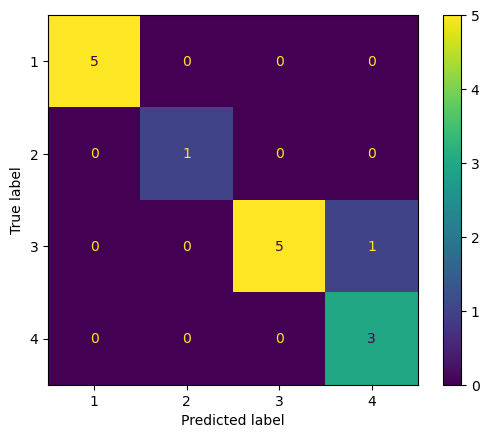

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    fruit_fit,  # We are directly passing the pipeline and let sklearn do the predictions for us
    X_test,
    y_test
)

In [59]:
from hashlib import sha1
assert sha1(str(type(fruit_mat is None)).encode("utf-8")+b"2cd7f795176c9db8").hexdigest() == "4f7f17ecaf90952f9427be887e2912f2d4029345", "type of fruit_mat is None is not bool. fruit_mat is None should be a bool"
assert sha1(str(fruit_mat is None).encode("utf-8")+b"2cd7f795176c9db8").hexdigest() == "b6297e8ace83e2e08d1289f26a9f34077c60ac72", "boolean value of fruit_mat is None is not correct"

assert sha1(str(type(fruit_mat)).encode("utf-8")+b"5695221d470a94ff").hexdigest() == "e0dc2341f5b49c6806b0885d9b0ff83ae5e42a4f", "type of type(fruit_mat) is not correct"

assert sha1(str(type(fruit_mat.to_numpy().sum())).encode("utf-8")+b"082d20001381ec00").hexdigest() == "2002ecca0b67af5f06ed5942f29e02f5ec0f3c84", "type of fruit_mat.to_numpy().sum() is not correct"
assert sha1(str(fruit_mat.to_numpy().sum()).encode("utf-8")+b"082d20001381ec00").hexdigest() == "3587b4e87de17aff1e6b91aafd4edc732a96b521", "value of fruit_mat.to_numpy().sum() is not correct"

print('Success!')

Success!


**Question 2.6** Multiple Choice:
<br> {points: 1}

Reading `fruit_mat`, how many observations were labelled correctly?

A. 7

B. 8

C. 9

D. 14

*Assign your answer to an object called `answer2_6`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [60]:
# your code here

answer2_6 = "D"

In [61]:
from hashlib import sha1
assert sha1(str(type(answer2_6)).encode("utf-8")+b"923885b4eddf5eb2").hexdigest() == "641bf28989dd79e40465c805d6ed5b7d7e111b95", "type of answer2_6 is not str. answer2_6 should be an str"
assert sha1(str(len(answer2_6)).encode("utf-8")+b"923885b4eddf5eb2").hexdigest() == "ac57fd9361498269d04561785d15781b8441ae68", "length of answer2_6 is not correct"
assert sha1(str(answer2_6.lower()).encode("utf-8")+b"923885b4eddf5eb2").hexdigest() == "76d0738f18986bec64988a613f36377ed60cd96d", "value of answer2_6 is not correct"
assert sha1(str(answer2_6).encode("utf-8")+b"923885b4eddf5eb2").hexdigest() == "cae7f3c1bd0eaf800d3483860ae83600c6c9666c", "correct string value of answer2_6 but incorrect case of letters"

print('Success!')

Success!


### 3. Cross-validation

**Question 3.1**
<br> {points: 1}

The vast majority of predictive models in statistics and machine learning have parameters that you have to pick. For the past few exercises, we have had to pick the number of neighbours for the class vote, which we have done arbitraily. But, is it possible to make this selection, *i.e., tune the model, in a principled way?* Ideally, we want to pick the number of neighborurs to maximize the performance of our classifier on data *it hasn’t seen yet*.

An important aspect of the tuning process is that we can, if we want to, split our training data again, train and evaluate a classifier for each split, and then choose the parameter based on all of the different results. If we just split our training data once, our best parameter choice will depend strongly on the randomness from how this single split was made. Using multiple different splits, we’ll get a more robust estimate of accuracy, which will lead to a more suitable choice of the number of neighbours $K$ to perform well on unseen data.

The idea of training and evaluating models on multiple training data splits times is called "cross-validation". In cross-validation, we split our overall training data into $C$ evenly-sized chunks, and then iteratively use 1 chunk as the **validation set** and combine the remaining $C−1$ chunks as the **training set.** The validation set is used in a similar was as the test set, **except** that the test set is only used once at the end to report model performance whether we use model performance on the validation set to select the model during cross-validation. 

---

We can perform a cross-validation in Python using the `cross_validate` function from the `scikit-learn` package. To use this function, you have to identify the model, the training set, and specify the `cv` parameter (the number of folds $C$, defaults to 5). We should set `return_train_score` to be `True` to return the training score as well.

Before we use the `cross_validate` function, we need to perform the pipeline analysis again. You can reuse the `X` and `y` variables you constructed from the training data earlier, as well as the `fruit_preprocessor`and `knn_spec` variables. However, you will need to create a new pipeline since the one we made earlier is already fitted on all the data and here we want to fit it on different splits of the data during cross-validation. Since the cross_validate function outputs a dictionary, we use `pd.DataFrame` to convert it to a dataframe for convenience, as in the textbook.

*Assign your answer to an object called `fruit_vfold_score`*.

In [69]:
np.random.seed(2020)  # DO NOT REMOVE

# ___ = ___(fruit_preprocessor, knn_spec)
# ___ = pd.___(
#     cross_validate(
#         estimator=___,
#         cv=5,
#         X=___,
#         y=___,
#         return_train_score=True,
#     )
# )

# your code here
fruit_pipe = make_pipeline(fruit_preprocessor, knn_spec)
fruit_vfold_score = pd.DataFrame(
    cross_validate(
        estimator=fruit_pipe,
        cv=5,
        X=fruit_data_scaled[["mass", "color_score"]],
        y=fruit_data_scaled["fruit_label"],
        return_train_score=True,
    )
)
fruit_vfold_score

,fit_time,score_time,test_score,train_score
0,0.011158,0.011250,0.750000,0.914894
1,0.009999,0.009999,0.833333,0.914894
2,0.006240,0.007000,0.583333,0.936170
3,0.008000,0.007000,0.833333,0.914894
4,0.006433,0.005792,0.909091,0.937500


In [71]:
from hashlib import sha1
assert sha1(str(type(fruit_vfold_score is None)).encode("utf-8")+b"ce4bc867827c6f25").hexdigest() == "d1e16a4575159945242730b7ad495ec9ac2a9282", "type of fruit_vfold_score is None is not bool. fruit_vfold_score is None should be a bool"
assert sha1(str(fruit_vfold_score is None).encode("utf-8")+b"ce4bc867827c6f25").hexdigest() == "8d0401248a9a5b3b7664ae01f4535d121434dd82", "boolean value of fruit_vfold_score is None is not correct"

assert sha1(str(type(fruit_vfold_score)).encode("utf-8")+b"00166b88039f9280").hexdigest() == "9aad0f1ff29d47ddf6a41e259a03753fdf27186a", "type of type(fruit_vfold_score) is not correct"

assert sha1(str(type(fruit_vfold_score.shape)).encode("utf-8")+b"42091c4002450a03").hexdigest() == "980b2a52b344888a461ebaa7c329722458077e3a", "type of fruit_vfold_score.shape is not tuple. fruit_vfold_score.shape should be a tuple"
assert sha1(str(len(fruit_vfold_score.shape)).encode("utf-8")+b"42091c4002450a03").hexdigest() == "9cab5127cf9bb516118360fdee96e1ecc8771b13", "length of fruit_vfold_score.shape is not correct"
assert sha1(str(sorted(map(str, fruit_vfold_score.shape))).encode("utf-8")+b"42091c4002450a03").hexdigest() == "a628899c061d97850ecab7354e653a5037708a31", "values of fruit_vfold_score.shape are not correct"
assert sha1(str(fruit_vfold_score.shape).encode("utf-8")+b"42091c4002450a03").hexdigest() == "b16744cc080cfa7bbee52c477414c2361fddc050", "order of elements of fruit_vfold_score.shape is not correct"

assert sha1(str(type(fruit_pipe is None)).encode("utf-8")+b"7c0fd07e83fc1880").hexdigest() == "ec377c3f112c2f5ec14188e4ee7cf44b4be3c88b", "type of fruit_pipe is None is not bool. fruit_pipe is None should be a bool"
assert sha1(str(fruit_pipe is None).encode("utf-8")+b"7c0fd07e83fc1880").hexdigest() == "a6c09732f801419f94d53789e0278ae4484c0bc9", "boolean value of fruit_pipe is None is not correct"

assert sha1(str(type(type(fruit_pipe))).encode("utf-8")+b"6d335c54e01fd5d9").hexdigest() == "53943b3b20226c59ed06d6cf50b1668e276b7447", "type of type(fruit_pipe) is not correct"
assert sha1(str(type(fruit_pipe)).encode("utf-8")+b"6d335c54e01fd5d9").hexdigest() == "0ab7e2d53363eb4aab6f1c105c416286f8be7d0c", "value of type(fruit_pipe) is not correct"

assert sha1(str(type(len(fruit_pipe.named_steps))).encode("utf-8")+b"d8cbb96ed866c63f").hexdigest() == "3ed57e09f83be1693ea3261f200ac4a267a71bef", "type of len(fruit_pipe.named_steps) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(len(fruit_pipe.named_steps)).encode("utf-8")+b"d8cbb96ed866c63f").hexdigest() == "86526913d082e6b08bf260a3113a96f82775405d", "value of len(fruit_pipe.named_steps) is not correct"

assert sha1(str(type(fruit_pipe.named_steps.keys())).encode("utf-8")+b"5f4ea7419672d188").hexdigest() == "d040283716712ea42113ec10f5da39f6b9a4ad8c", "type of fruit_pipe.named_steps.keys() is not correct"
assert sha1(str(fruit_pipe.named_steps.keys()).encode("utf-8")+b"5f4ea7419672d188").hexdigest() == "35d8549a18e0f22c93b22c55eaf8ca93ea3360e0", "value of fruit_pipe.named_steps.keys() is not correct"

print('Success!')

Success!


**Question 3.2**
<br> {points: 1}

Now that we have ran a cross-validation on each train/validation split, one has to ask, how accurate was the classifier's validation across the folds? We can aggregate the *mean* and *standard error* of these scores from each folds. The standard error is essentially a measure of how uncertain we are in the mean value. Use the `agg` dataframe method to compute both the mean and the standard error; make sure the first row of the dataframe contains the mean values and the second contains the standard error values.

*Assign your answer to an object called `fruit_metrics`.*

In [66]:
# ___ = fruit_vfold_score.___([___, ___])


# your code here
fruit_metrics = fruit_vfold_score.agg(["mean", "std"])
fruit_metrics

,fit_time,score_time,test_score,train_score
mean,0.007227,0.007534,0.781818,0.923670
std,0.000837,0.001605,0.124413,0.012027


In [68]:
from hashlib import sha1
assert sha1(str(type(fruit_metrics.shape)).encode("utf-8")+b"8fd2c5ec7c17cd47").hexdigest() == "c63cb94ebbae686ea51b0f6d0ea8b078dc58f22a", "type of fruit_metrics.shape is not tuple. fruit_metrics.shape should be a tuple"
assert sha1(str(len(fruit_metrics.shape)).encode("utf-8")+b"8fd2c5ec7c17cd47").hexdigest() == "32ad8bfbe955c23e311aee2aa7fb3fbba421306b", "length of fruit_metrics.shape is not correct"
assert sha1(str(sorted(map(str, fruit_metrics.shape))).encode("utf-8")+b"8fd2c5ec7c17cd47").hexdigest() == "79ae71a31f0d0b6974e0c08b86c8e01de4b3122c", "values of fruit_metrics.shape are not correct"
assert sha1(str(fruit_metrics.shape).encode("utf-8")+b"8fd2c5ec7c17cd47").hexdigest() == "d3815fa949ae450a424f96cc9d588260baed19a5", "order of elements of fruit_metrics.shape is not correct"

assert sha1(str(type(fruit_metrics)).encode("utf-8")+b"19fc0eadb51cdb76").hexdigest() == "dc910a13fed3230a95f99238fb2acc3a832bc785", "type of fruit_metrics is not correct"
assert sha1(str(fruit_metrics).encode("utf-8")+b"19fc0eadb51cdb76").hexdigest() == "4f7cbe6cbb6bca92a8eacda14c49418db4764e7f", "value of fruit_metrics is not correct"

assert sha1(str(type(fruit_metrics.test_score)).encode("utf-8")+b"4a5905cfb43b78c6").hexdigest() == "ce5b9eba8ee6d72928972101790e9ac1cf998624", "type of fruit_metrics.test_score is not correct"
assert sha1(str(fruit_metrics.test_score).encode("utf-8")+b"4a5905cfb43b78c6").hexdigest() == "af0c82e8299cbc7766cc6e443d0d2ba90d2d589c", "value of fruit_metrics.test_score is not correct"

print('Success!')

AssertionError: value of fruit_metrics.test_score is not correct

## 4. Parameter value selection

Using a 5-fold cross-validation, we have established a prediction accuracy for our classifier. If we were to improve our classifier, we would like to try different number of neighbours, $K$. Then we could use cross-validation to calculate an accuracy for each value of $K$ in a reasonable range, and pick the value of $K$ that gives us the best accuracy on the validation data. 

The great thing about the `scikit-learn` package is that it provides functions to conveniently tune parameters such as $K$ by training and evaluating models (via crossvalidation) for a range of specified values of $K$. The function we will use here is called "exhaustive grid search" ([sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)).

**Question 4.0**
<br> {points: 1}

Create a new K-nearest neighbor model specification but instead of specifying a particular value for the `n_neighbors` argument, try exploring a range of values with `GridSearchCV`. Before we use `GridSearchCV`, we should define the grid of values that we want to explore, and redefine the pipeline without specifying a particular value of $K$. To save us some time, instruct the grid search to use 4-fold cross-validation, rather than the default 5-fold.

*Assign your answer to an object called `knn_tune_grid`.* 

In [72]:
### Run this cell
param_grid = {
    "kneighborsclassifier__n_neighbors": range(2, 15, 1),
}
fruit_tune_pipe = make_pipeline(fruit_preprocessor, KNeighborsClassifier())

In [75]:
# ___ = GridSearchCV(
#     ___, ___, ___=__,
# )


# your code here
knn_tune_grid = GridSearchCV(
    fruit_tune_pipe,
    param_grid,
    cv=4,
)
knn_tune_grid

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['mass',
                                                                          'color_score'])],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 15)})

In [76]:
from hashlib import sha1
assert sha1(str(type(knn_tune_grid is None)).encode("utf-8")+b"4f05cf719d825b71").hexdigest() == "c24d5ca63ab6c148176d757babc5995188b8cbb2", "type of knn_tune_grid is None is not bool. knn_tune_grid is None should be a bool"
assert sha1(str(knn_tune_grid is None).encode("utf-8")+b"4f05cf719d825b71").hexdigest() == "37ec9b9aae1ce9fe5e0cf23e3cbfd65bb5d82f43", "boolean value of knn_tune_grid is None is not correct"

assert sha1(str(type(type(knn_tune_grid))).encode("utf-8")+b"08d065e3fcb805c6").hexdigest() == "7af03fcc697c40a3f8d4a575fcc78a0ad3d55ab6", "type of type(knn_tune_grid) is not correct"
assert sha1(str(type(knn_tune_grid)).encode("utf-8")+b"08d065e3fcb805c6").hexdigest() == "6e0a988f67e396e2612e660d774d218280a31cb0", "value of type(knn_tune_grid) is not correct"

assert sha1(str(type(knn_tune_grid.param_grid.keys())).encode("utf-8")+b"97428bc8f89142f2").hexdigest() == "22ec83be0020aff497ab7306ba0aa7450f6a24a9", "type of knn_tune_grid.param_grid.keys() is not correct"
assert sha1(str(knn_tune_grid.param_grid.keys()).encode("utf-8")+b"97428bc8f89142f2").hexdigest() == "e251369423129f3080ffbd5ae5c603232a452719", "value of knn_tune_grid.param_grid.keys() is not correct"

assert sha1(str(type(knn_tune_grid.estimator.named_steps.keys())).encode("utf-8")+b"6695a3ec7610ab1e").hexdigest() == "23a444ef6e323aef592355abcabdf28eee0459dd", "type of knn_tune_grid.estimator.named_steps.keys() is not correct"
assert sha1(str(knn_tune_grid.estimator.named_steps.keys()).encode("utf-8")+b"6695a3ec7610ab1e").hexdigest() == "1825569109c511d77eb705fa76fd8d98d840c086", "value of knn_tune_grid.estimator.named_steps.keys() is not correct"

assert sha1(str(type(knn_tune_grid.cv)).encode("utf-8")+b"7a2a024aeb2c2e14").hexdigest() == "3ee689d699d94017921301b456a7ee95bac9a139", "type of knn_tune_grid.cv is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(knn_tune_grid.cv).encode("utf-8")+b"7a2a024aeb2c2e14").hexdigest() == "1543ff3024e57eff14aae4bfe803a13c5e74d864", "value of knn_tune_grid.cv is not correct"

print('Success!')

Success!


**Question 4.1**
<br>{points: 1}

Now, let's fit the grid search object to the data, using the `X` and `y` variables we created earlier.

*Assign your tuned model to a variable called `knn_model_grid`.*

Next, from `knn_model_grid`, find out the `cv_results_` and save it in a dataframe. 

*Assign your answer to a variable called `accuracies_grid`.*

In [77]:
# ___ = ___.fit(___, ___)

# ___ = pd.DataFrame(___.cv_results_)

# your code here
knn_model_grid = knn_tune_grid.fit(X,y)
accuracies_grid = pd.DataFrame(knn_model_grid.cv_results_)

accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007213,0.000827,0.006394,0.001255,2,{'kneighborsclassifier__n_neighbors': 2},0.818182,1.000000,0.818182,0.545455,0.795455,0.162305,3
1,0.006319,0.000367,0.005864,0.000261,3,{'kneighborsclassifier__n_neighbors': 3},1.000000,0.909091,0.727273,0.818182,0.863636,0.101639,1
2,0.006945,0.000949,0.006323,0.000480,4,{'kneighborsclassifier__n_neighbors': 4},0.909091,0.727273,0.727273,0.818182,0.795455,0.075378,4
3,0.006228,0.000496,0.005783,0.000193,5,{'kneighborsclassifier__n_neighbors': 5},1.000000,0.727273,0.727273,0.818182,0.818182,0.111340,2
4,0.006556,0.000540,0.005704,0.000301,6,{'kneighborsclassifier__n_neighbors': 6},1.000000,0.636364,0.727273,0.727273,0.772727,0.136364,5
5,0.006124,0.000510,0.005869,0.000249,7,{'kneighborsclassifier__n_neighbors': 7},1.000000,0.636364,0.727273,0.727273,0.772727,0.136364,5
6,0.006115,0.000364,0.005986,0.000397,8,{'kneighborsclassifier__n_neighbors': 8},1.000000,0.636364,0.636364,0.545455,0.704545,0.174571,7
7,0.005998,0.000437,0.006644,0.000738,9,{'kneighborsclassifier__n_neighbors': 9},0.818182,0.636364,0.545455,0.454545,0.613636,0.134456,8
8,0.007108,0.000513,0.006518,0.000673,10,{'kneighborsclassifier__n_neighbors': 10},0.818182,0.545455,0.363636,0.363636,0.522727,0.186031,9
9,0.006002,0.000189,0.005952,0.000300,11,{'kneighborsclassifier__n_neighbors': 11},0.818182,0.636364,0.363636,0.272727,0.522727,0.216804,10


In [78]:
from hashlib import sha1
assert sha1(str(type(type(knn_model_grid))).encode("utf-8")+b"d77fd3264047552a").hexdigest() == "4872f352b48b1f0b96cb4344309fd73fa278257a", "type of type(knn_model_grid) is not correct"
assert sha1(str(type(knn_model_grid)).encode("utf-8")+b"d77fd3264047552a").hexdigest() == "4adcbd95a3cf824c2b384c4052fb2afa9142fcc5", "value of type(knn_model_grid) is not correct"

assert sha1(str(type(accuracies_grid is None)).encode("utf-8")+b"7fe447efdcf8af1c").hexdigest() == "0887cb3888f225d663a45be21d321940ecb6d123", "type of accuracies_grid is None is not bool. accuracies_grid is None should be a bool"
assert sha1(str(accuracies_grid is None).encode("utf-8")+b"7fe447efdcf8af1c").hexdigest() == "57cc1ca4a3329eaa78691d3ad5cb892ad40b394c", "boolean value of accuracies_grid is None is not correct"

assert sha1(str(type(accuracies_grid)).encode("utf-8")+b"ced1567994c0195a").hexdigest() == "7b6ea0e2fb38a28fa8e6e2ffa934f7a4e490a8c5", "type of type(accuracies_grid) is not correct"

assert sha1(str(type(accuracies_grid.shape)).encode("utf-8")+b"c49cc51223ca7462").hexdigest() == "6ad571996039e53c9eb698be7e81feca1e666f94", "type of accuracies_grid.shape is not tuple. accuracies_grid.shape should be a tuple"
assert sha1(str(len(accuracies_grid.shape)).encode("utf-8")+b"c49cc51223ca7462").hexdigest() == "a10497a8c52837b7aaa4877ee8786c25d0d21c45", "length of accuracies_grid.shape is not correct"
assert sha1(str(sorted(map(str, accuracies_grid.shape))).encode("utf-8")+b"c49cc51223ca7462").hexdigest() == "aa0fbc20cf86fc7af5fec27a052154a0ef90cb27", "values of accuracies_grid.shape are not correct"
assert sha1(str(accuracies_grid.shape).encode("utf-8")+b"c49cc51223ca7462").hexdigest() == "78c6afac7349e0da08c78399d9a3367a1c8cc9c4", "order of elements of accuracies_grid.shape is not correct"

assert sha1(str(type(sum(accuracies_grid.mean_test_score))).encode("utf-8")+b"801d9617b64066c1").hexdigest() == "4c2efdbd7049a5b8c5702f46eccafe01463d48f3", "type of sum(accuracies_grid.mean_test_score) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(sum(accuracies_grid.mean_test_score), 2)).encode("utf-8")+b"801d9617b64066c1").hexdigest() == "72d7567564158293ae6bcc615eec1fa41f87c274", "value of sum(accuracies_grid.mean_test_score) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(sum(accuracies_grid.std_test_score))).encode("utf-8")+b"918d116d9fdf68ac").hexdigest() == "ae7c2eb4b14a3db4d8f733b5ccdf5b816df99b08", "type of sum(accuracies_grid.std_test_score) is not float. Please make sure it is float and not np.float64, etc. You can cast your value into a float using float()"
assert sha1(str(round(sum(accuracies_grid.std_test_score), 2)).encode("utf-8")+b"918d116d9fdf68ac").hexdigest() == "ad32461a331e04e21bfaabcd45944480421c1106", "value of sum(accuracies_grid.std_test_score) is not correct (rounded to 2 decimal places)"

assert sha1(str(type(sum(accuracies_grid.param_kneighborsclassifier__n_neighbors))).encode("utf-8")+b"a47c01f642a80d48").hexdigest() == "96a5c2bd1105e644a184092f7ed3897d092015f2", "type of sum(accuracies_grid.param_kneighborsclassifier__n_neighbors) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"
assert sha1(str(sum(accuracies_grid.param_kneighborsclassifier__n_neighbors)).encode("utf-8")+b"a47c01f642a80d48").hexdigest() == "980349e8a36c69ecc22a0d066aa3bb1626d561d9", "value of sum(accuracies_grid.param_kneighborsclassifier__n_neighbors) is not correct"

print('Success!')

AssertionError: value of sum(accuracies_grid.mean_test_score) is not correct (rounded to 2 decimal places)

**Question 4.2**
<br>{points: 1} 


Visually inspecting the grid search results can help us find the best value for the number of neighbors parameter.

Create a line plot using the `accuracies_grid` dataframe with `param_kneighborsclassifier__n_neighbors` on the x-axis and the `mean_test_score` on the y-axis. Use `point=True` to include a point for each value of $K$. Make it an effective visualization.

*Assign your answer to a variable called `accuracy_versus_k_grid`.*

In [79]:
# ___ = alt.Chart(___).mark_line(___).encode(
#     x=alt.X(___)
#         .title(___)
#         .scale(zero=False),
#     y=alt.Y(___)
#         .title(___)
#         .scale(zero=False)
# )


# your code here
accuracy_versus_k_grid = alt.Chart(accuracies_grid).mark_line(point=True).encode(
    x=alt.X("param_kneighborsclassifier__n_neighbors")
        .title("k")
        .scale(zero=False),
    y=alt.Y("mean_test_score")
        .title("Mean Accuracy")
        .scale(zero=False)
)
accuracy_versus_k_grid

d:\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
d:\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [80]:
from hashlib import sha1
assert sha1(str(type(accuracy_versus_k_grid is None)).encode("utf-8")+b"1bd668b8d6fe37a6").hexdigest() == "805d34531f36d04f571d1340e8d349a49d4c7dbc", "type of accuracy_versus_k_grid is None is not bool. accuracy_versus_k_grid is None should be a bool"
assert sha1(str(accuracy_versus_k_grid is None).encode("utf-8")+b"1bd668b8d6fe37a6").hexdigest() == "0bfc329a622907907b94a4e86b9c02345e15e57b", "boolean value of accuracy_versus_k_grid is None is not correct"

assert sha1(str(type(accuracy_versus_k_grid.encoding.x['shorthand'])).encode("utf-8")+b"c18078810e0d9ecc").hexdigest() == "36ca7b78020df156d5efb1870e94851b434daef7", "type of accuracy_versus_k_grid.encoding.x['shorthand'] is not str. accuracy_versus_k_grid.encoding.x['shorthand'] should be an str"
assert sha1(str(len(accuracy_versus_k_grid.encoding.x['shorthand'])).encode("utf-8")+b"c18078810e0d9ecc").hexdigest() == "573f94a6d1424421f8e5b97470caf58f6da14029", "length of accuracy_versus_k_grid.encoding.x['shorthand'] is not correct"
assert sha1(str(accuracy_versus_k_grid.encoding.x['shorthand'].lower()).encode("utf-8")+b"c18078810e0d9ecc").hexdigest() == "06ffa6b019f0e565e3940e07d96813a4d4b7c2c3", "value of accuracy_versus_k_grid.encoding.x['shorthand'] is not correct"
assert sha1(str(accuracy_versus_k_grid.encoding.x['shorthand']).encode("utf-8")+b"c18078810e0d9ecc").hexdigest() == "06ffa6b019f0e565e3940e07d96813a4d4b7c2c3", "correct string value of accuracy_versus_k_grid.encoding.x['shorthand'] but incorrect case of letters"

assert sha1(str(type(accuracy_versus_k_grid.encoding.y['shorthand'])).encode("utf-8")+b"5637c8051bd0a169").hexdigest() == "bad297f3dcbb9a74a3da225ba73a877f82446f62", "type of accuracy_versus_k_grid.encoding.y['shorthand'] is not str. accuracy_versus_k_grid.encoding.y['shorthand'] should be an str"
assert sha1(str(len(accuracy_versus_k_grid.encoding.y['shorthand'])).encode("utf-8")+b"5637c8051bd0a169").hexdigest() == "8812751cf2564034c859592284699b9754ef0b0b", "length of accuracy_versus_k_grid.encoding.y['shorthand'] is not correct"
assert sha1(str(accuracy_versus_k_grid.encoding.y['shorthand'].lower()).encode("utf-8")+b"5637c8051bd0a169").hexdigest() == "69b9296a7d0e58f7d02373fd5e40bfef203bcfdc", "value of accuracy_versus_k_grid.encoding.y['shorthand'] is not correct"
assert sha1(str(accuracy_versus_k_grid.encoding.y['shorthand']).encode("utf-8")+b"5637c8051bd0a169").hexdigest() == "69b9296a7d0e58f7d02373fd5e40bfef203bcfdc", "correct string value of accuracy_versus_k_grid.encoding.y['shorthand'] but incorrect case of letters"

assert sha1(str(type(accuracy_versus_k_grid.mark)).encode("utf-8")+b"ea03b1dd7b38997b").hexdigest() == "7e5a52e1eeffc695e65ad6728134f73ed9a45832", "type of accuracy_versus_k_grid.mark is not correct"
assert sha1(str(accuracy_versus_k_grid.mark).encode("utf-8")+b"ea03b1dd7b38997b").hexdigest() == "970b03d252cadc2095286f25cae784d7bb891be1", "value of accuracy_versus_k_grid.mark is not correct"

assert sha1(str(type(accuracy_versus_k_grid.mark['point'])).encode("utf-8")+b"de65079c11e91819").hexdigest() == "3b5256a71993f28d2fe58aabc9b0a79a274c5d0f", "type of accuracy_versus_k_grid.mark['point'] is not bool. accuracy_versus_k_grid.mark['point'] should be a bool"
assert sha1(str(accuracy_versus_k_grid.mark['point']).encode("utf-8")+b"de65079c11e91819").hexdigest() == "5f0da302e8c3b410b34ed6172e348e190973bade", "boolean value of accuracy_versus_k_grid.mark['point'] is not correct"

print('Success!')

Success!


From the plots above, we can see that $K = 2$ or $3$ provides the highest accuracy. Larger $K$ values result in a reduced accuracy estimate. Remember: the values you see on this plot are **estimates** of the true accuracy of our classifier. Although this is the best information we have access to for what the ideal value of $K$ would be, it is  not a gurantee that the classifier will always be more accurate with this parameter value when it is used in practice! 

Great, now you have completed a full analysis with cross-validation using the `scikit-learn` package! For your information, we can choose any number of folds and typically, the more we use the better our accuracy estimate will be (lower standard error). However, more folds would mean a greater computation time. In practice, $cv$ is chosen to be either 5 or 10. 